In [12]:
require(data.table)
library(dplyr)
library(tidyverse)
library(rpart)
library(rpart.plot)
library(maps)
library(mapdata)
library(factoextra)
data <- fread("uszips.csv", select = c("zip", "lat", "lng"))

In [13]:
data <- data[!(data$zip < 01000 | data$zip >= 99501),]

In [14]:
#data <- data[!(data$zip >= 96701 && data$zip <= 96952),]

In [15]:
data$zip <- as.character(data$zip)
tail(data)

zip,lat,lng
<chr>,<dbl>,<dbl>
99362,46.08931,-118.3074
99363,46.06652,-118.8885
99371,46.80678,-118.3168
99401,46.08744,-117.2514
99402,46.19394,-117.1474
99403,46.37243,-117.2527


In [16]:
print(nrow(data))

[1] 32741


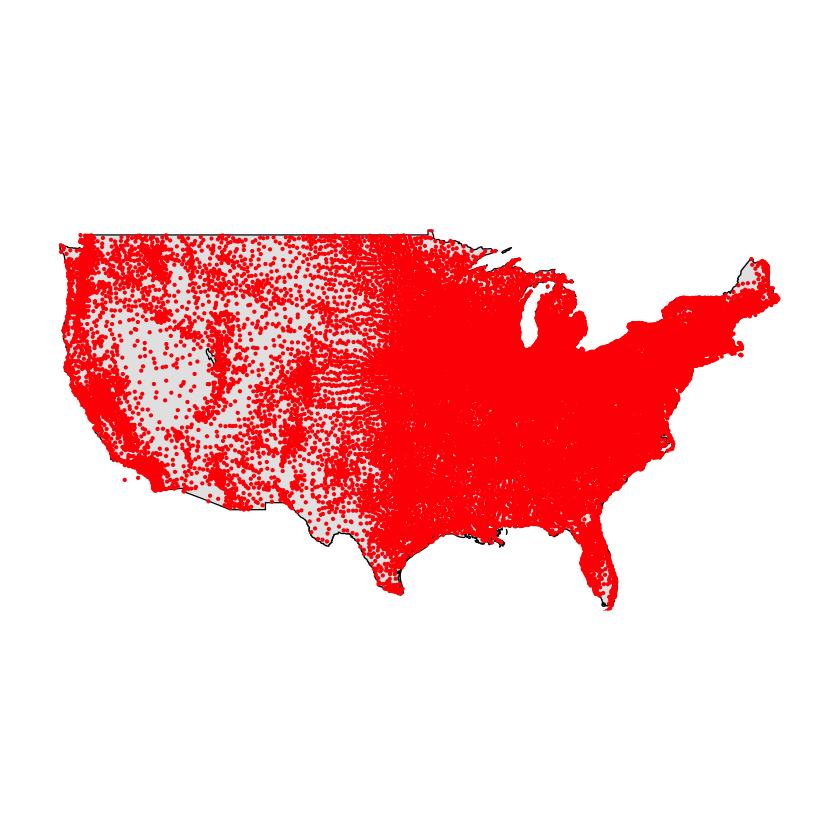

In [17]:
map("worldHires",'usa', xlim=c(-125, -66.6), ylim=c(25.1, 49.1), col='gray90', fill=TRUE)
points(data$lng, data$lat, pch=20, col="red", cex=0.5)

In [20]:
#data[] <- lapply(data, function(x) if(is.numeric(x)){
#                     scale(x, center=TRUE, scale=TRUE)
#                      } else x)
tail(data)

zip,lat,lng
<chr>,<dbl>,<dbl>
99362,46.08931,-118.3074
99363,46.06652,-118.8885
99371,46.80678,-118.3168
99401,46.08744,-117.2514
99402,46.19394,-117.1474
99403,46.37243,-117.2527


In [21]:
set.seed(1234)
kmean <- kmeans(data, 10, nstart = 15)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1637050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1637050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1637050)”


In [38]:
paste("Zip Codes in Each Cluster: ", toString(kmean[7]))
print(kmean[2])

[1] "Zip Codes in Each Cluster:  c(3642, 2509, 3407, 2897, 3542, 2346, 3351, 3849, 3905, 3293)"

$centers
         zip      lat        lng
1  26748.516 36.24023  -80.17568
2   5102.239 42.36178  -72.20716
3  56450.805 44.79115  -95.17889
4  95317.420 39.24312 -120.57634
5  74861.253 32.61268  -95.66823
6  84118.049 37.99479 -109.21886
7  64934.546 39.37755  -93.48027
8  47004.821 41.16969  -86.10167
9  15592.842 41.21727  -76.48194
10 36597.824 32.75079  -85.14373



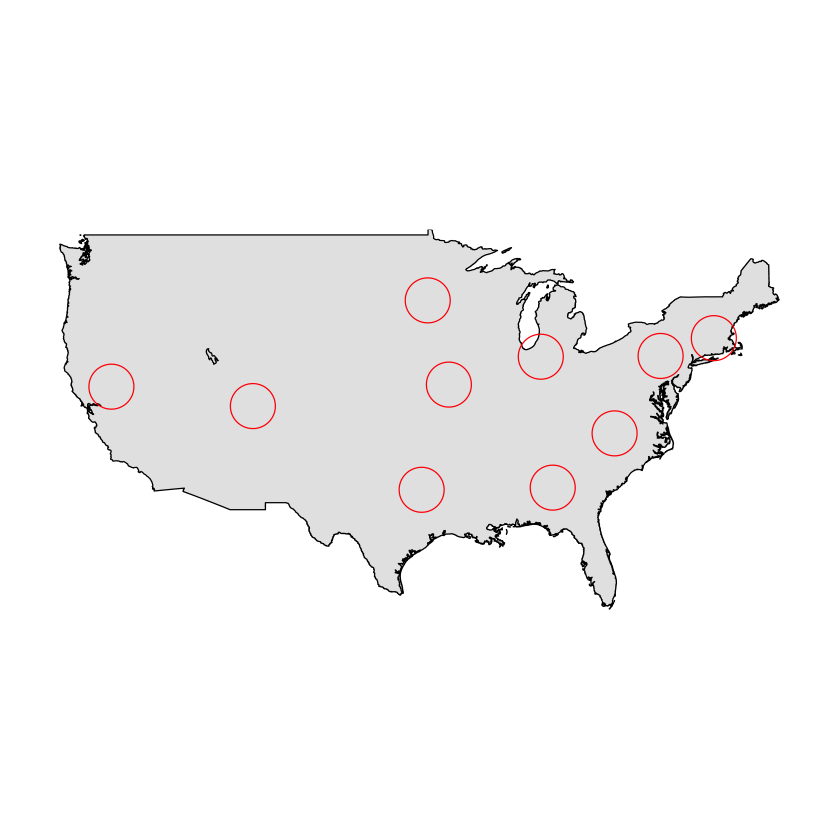

In [93]:
#print(as.double(kmean$centers[11:20]))
lat <- as.double(kmean$centers[11:20])
lng <- as.double(kmean$centers[21:30])
#print(lng)
results <- data.frame(lat, lng)
#print(results)
map("worldHires",'usa', xlim=c(-125, -66.6), ylim=c(25.1, 49.1), col='gray90', fill=TRUE)
points(results$lng, results$lat, pch=21, col="red", cex=5)

In [ ]:
# The above 10 clusters coorespond to the below 10 cities (in no particular order)
# 1. Charlotte/Greensboro, NC
# 2. Boston, MA
# 3. Minneapolis, MN
# 4. Sacramento/San Fransisco, CA
# 5. Dallas, TX
# 6. Albuquerque, NM
# 7. Kansas City, MO
# 8. Indianapolis, IN
# 9. Philadelphia, PA/New York, NY
# 10. Atlanta/Columbus, GA